In [ ]:
# ..... Seurat integration by stage - 8 samples, SCTransform + CCA ..... #
# _data files have filtered out doublets, cells with <200 genes expressed,
# cells with >200 but <12,000 UMI, and MT ratio >0.4

In [2]:
library(Seurat)
library(SeuratDisk)

In [4]:
seu0 = readRDS('chicken_integrated_ssSTACAS_v2.rds')
seu0

An object of class Seurat 
19007 features across 50547 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [5]:
seu1 = CreateSeuratObject(counts = LayerData(seu0, assay = 'RNA', layer = 'counts'),
                         meta.data = seu0@meta.data)
seu1

An object of class Seurat 
17007 features across 50547 samples within 1 assay 
Active assay: RNA (17007 features, 0 variable features)
 1 layer present: counts

In [6]:
ifnb.list <- SplitObject(seu1, split.by = "dataset")

In [7]:
# normalize and identify variable features for each dataset independently
# SCTransform normalization
ifnb.list <- lapply(X = ifnb.list, FUN = SCTransform, method = "glmGamPoi") # faster
features <- SelectIntegrationFeatures(object.list = ifnb.list, nfeatures = 2000)
ifnb.list <- PrepSCTIntegration(object.list = ifnb.list, anchor.features = features)
ifnb.list <- lapply(X = ifnb.list, FUN = RunPCA, features = features)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 14323 by 6271

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 94 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 14323 genes

Computing corrected count matrix for 14323 genes

Calculating gene attributes

Wall clock passed: Time difference of 29.75369 secs

Determine variable features

Centering data matrix

Getting residuals for block 1(of 2) for counts dataset

Getting residuals for block 2(of 2) for counts dataset

Centering data matrix

Finished calculating residuals for counts

Set default assay to SCT

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and 

In [8]:
# identify anchors and integrate data
immune.anchors <- FindIntegrationAnchors(object.list = ifnb.list, normalization.method = "SCT", reduction = "rpca",
    anchor.features = features, dims = 1:30)
immune.combined.sct <- IntegrateData(anchorset = immune.anchors, normalization.method = "SCT", dims = 1:30)

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 9251 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 6846 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 7206 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 6339 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 6305 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 9723 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 5970 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods



[1] 1


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”


[1] 2


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”


[1] 3


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”


[1] 4


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”


[1] 5


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”


[1] 6


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”


[1] 7


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”


[1] 8


Warning message:
“Different cells and/or features from existing assay SCT”
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Merging dataset 6 into 8

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Merging dataset 5 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Merging dataset 4 into 3 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

War

In [9]:
# run pca, umap
immune.combined.sct <- RunPCA(immune.combined.sct, verbose = FALSE)
immune.combined.sct <- RunUMAP(immune.combined.sct, reduction = "pca", dims = 1:30)

# cluster integrated data
immune.combined.sct <- FindNeighbors(immune.combined.sct, reduction = "pca", dims = 1:30)
immune.combined.sct <- FindClusters(immune.combined.sct, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:17:36 UMAP embedding parameters a = 0.9922 b = 1.112

15:17:36 Read 50547 rows and found 30 numeric columns

15:17:36 Using Annoy for neighbor search, n_neighbors = 30

15:17:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:17:42 Writing NN index file to temp file /tmp/Rtmp1eboBq/file8dff5488e3e97

15:17:42 Searching Annoy index using 1 thread, search_k = 3000

15:18:00 Annoy recall = 100%

15:18:01 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 50547
Number of edges: 2009915

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9439
Number of communities: 21
Elapsed time: 17 seconds


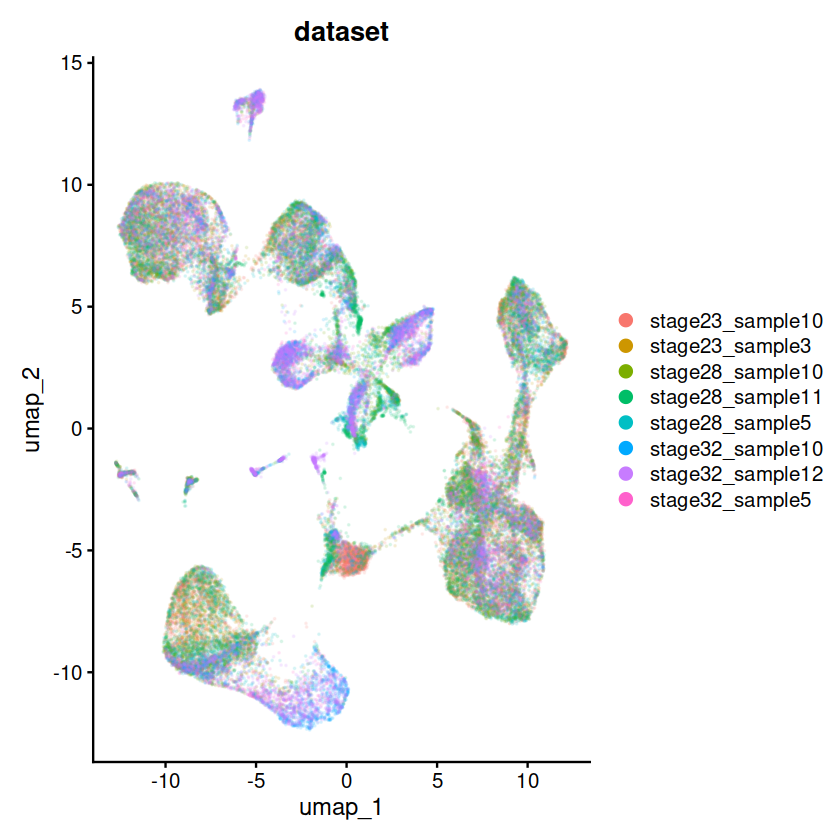

In [10]:
# plot integrated umap
tplot <- DimPlot(immune.combined.sct, reduction = "umap", group.by = "dataset")
tplot[[1]]$layers[[1]]$aes_params$alpha =  .1
tplot

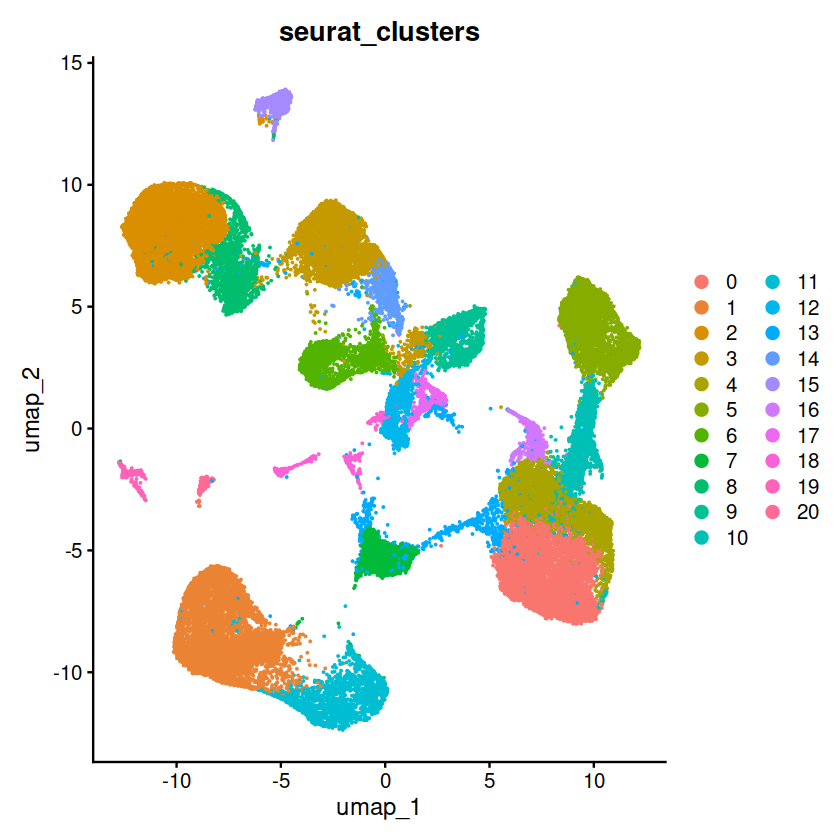

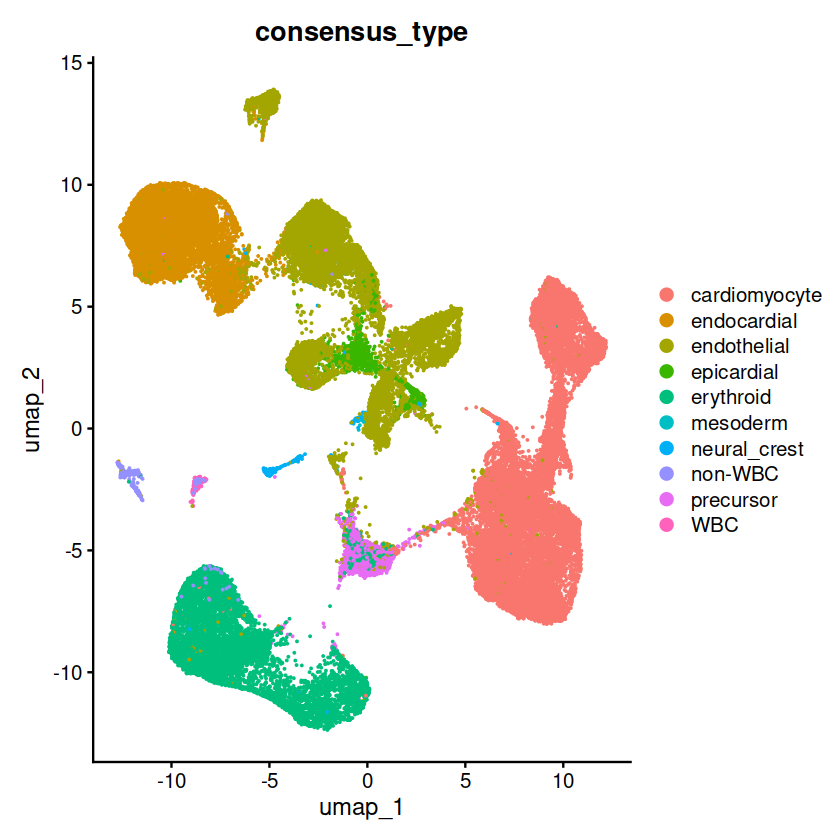

In [11]:
DimPlot(immune.combined.sct, reduction = "umap", group.by = "seurat_clusters")
DimPlot(immune.combined.sct, reduction = "umap", group.by = "consensus_type")

In [13]:
# just embeddings
df = immune.combined.sct@reductions$pca@cell.embeddings
rownames(df) = NULL
colnames(df) = NULL
df[1:2,]

[,1]      [,2]       [,3]       [,4]     [,5]       [,6]       [,7]      
[1,] -22.76573 -13.019181 -20.214258 1.183946  5.5055650 -0.7062807 -0.2062222
[2,]  21.05652  -3.076575  -1.420968 1.508690 -0.1788045  6.0297080 -2.5173546
     [,8]      [,9]      [,10]       [,11] [,12]     [,13]      [,14]   
[1,]  2.926332  4.811415 -1.00494519 ⋯     -2.694154 -0.8574663 1.184322
[2,] -3.703774 11.672090 -0.06951823 ⋯     -1.858912 -2.1641879 3.359427
     [,15]    [,16]      [,17]      [,18]     [,19]      [,20]     [,21]     
[1,] 2.920477 -2.0609609  0.4247986  1.362716 -3.3326795  2.230937  2.4513414
[2,] 1.700341  0.7081381 -0.1826060 -1.513594  0.2908692 -2.154025 -0.4567338

In [14]:
# save cluster and umap from merging all batches
write.table(df[,1:30], file = 'chicken_RPCA_embeddings_new2.csv', sep = ',', row.names = F,
           col.names = F, quote = F)